# Fuzzy Detection

Using fuzzy detection to detect zones of different texture in an image. >> 
From: https://towardsdatascience.com/image-processing-with-python-working-with-entropy-b05e9c84fc36

Importing necessary packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow, imsave
from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import feature
from skimage import filters
from math import sqrt
from skimage import segmentation
from myfuncs import funcs

Importing image

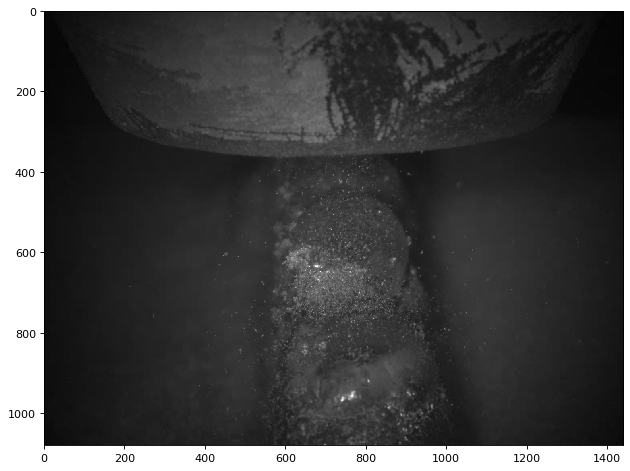

In [5]:
trail = imread('Images/Inputs/Set1/20240816-161944712534-0002.png')
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(trail)

convert to grayscale

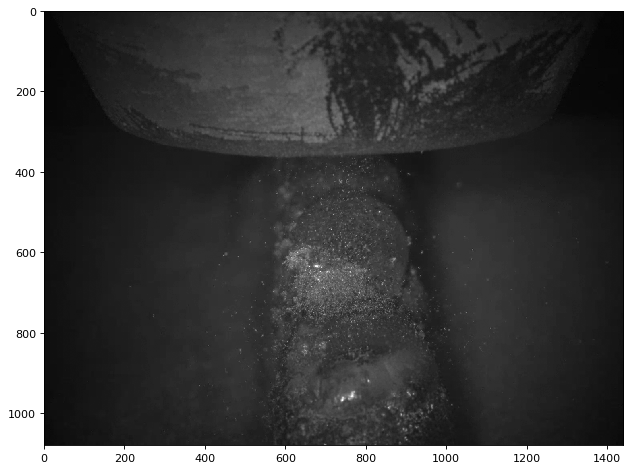

In [6]:
trail_gray = rgb2gray(imread('Images/Inputs/Set1/20240816-161944712534-0002.png'))
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(trail_gray);

Apply Entropy function

/Users/sid/opt/anaconda3/envs/3dpmd/lib/python3.12/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


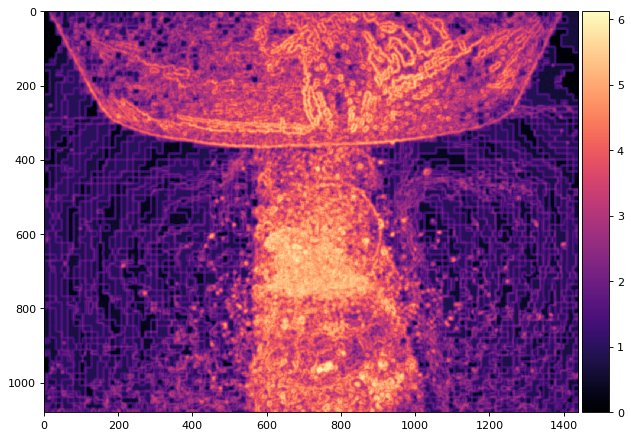

In [7]:
entropy_image = entropy(img_as_ubyte(trail_gray), disk(5))
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(entropy_image, cmap = 'magma')

Function to show different kinds of entropy values for an image

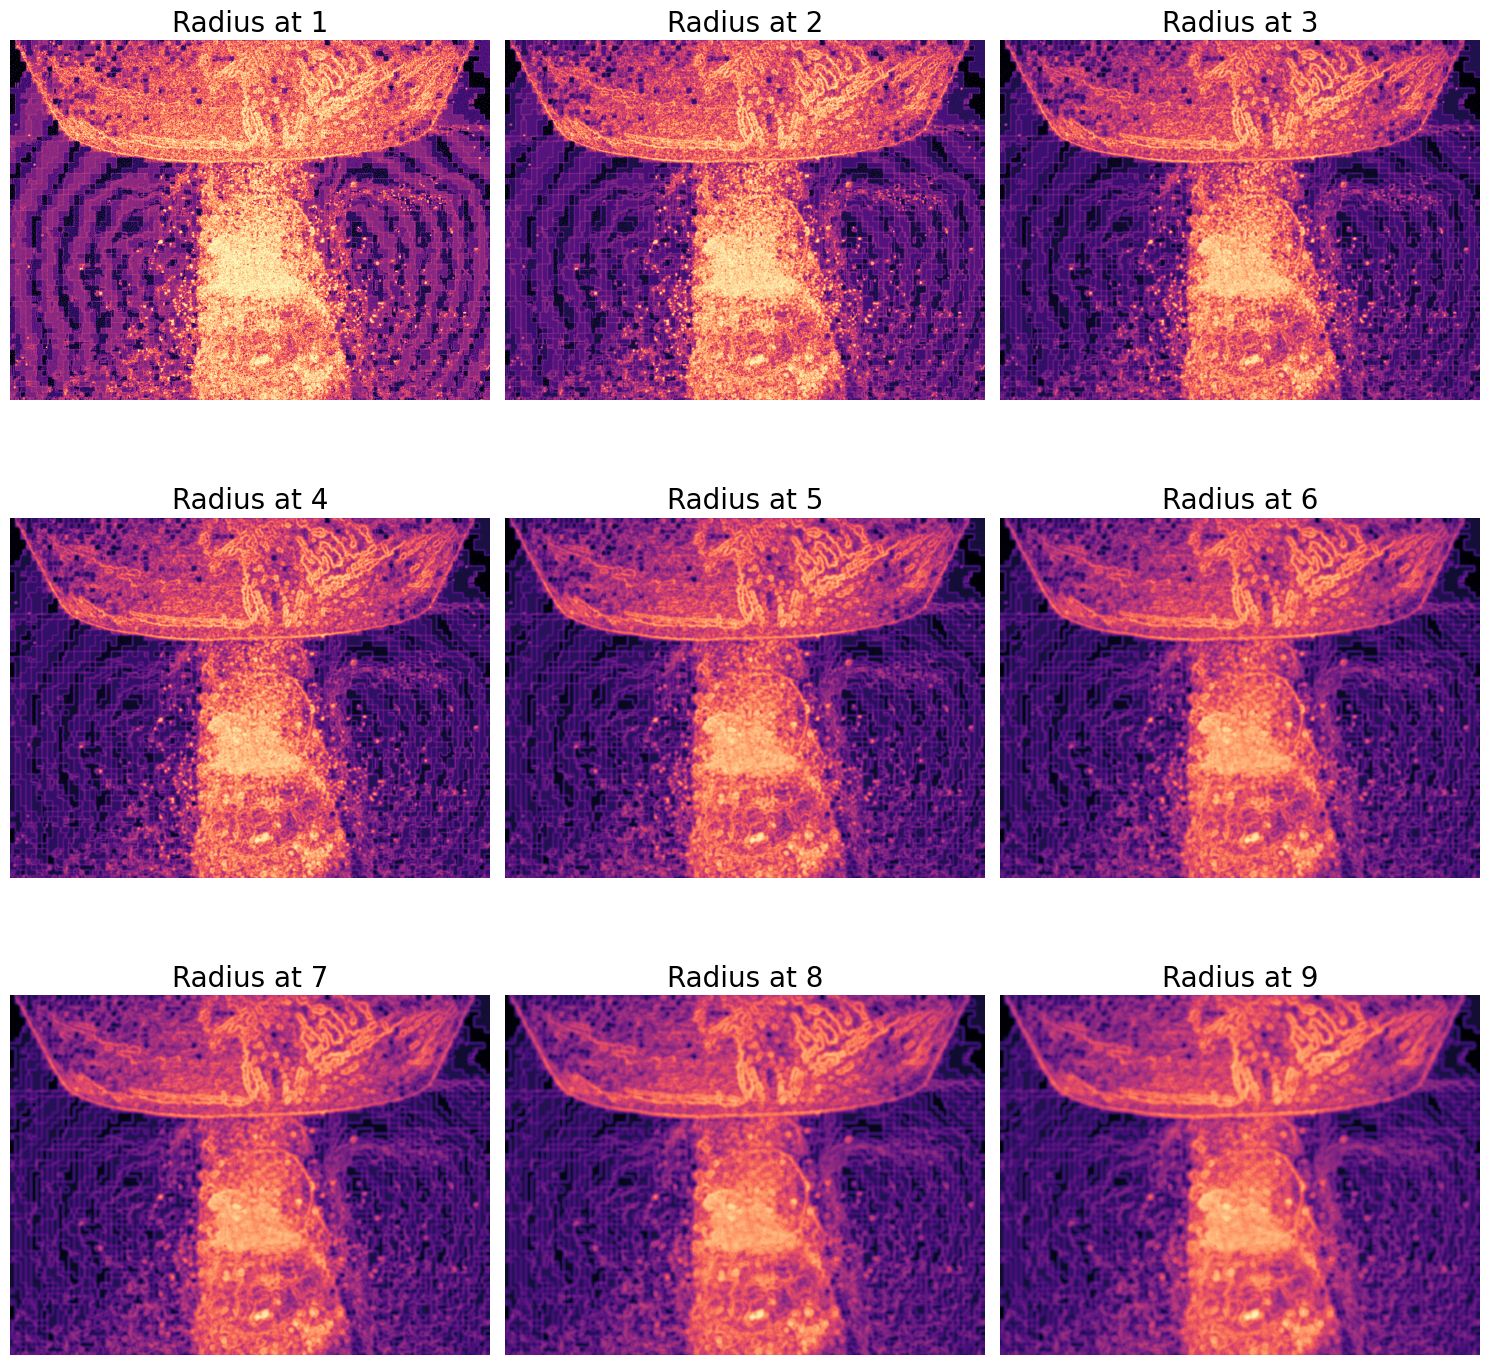

In [8]:
funcs.entropy_checker(trail)

Now we choose an entropy radius value that gives a good enough contrast without being too blurry. In this case 5-7 look good

Next we choose a threshold radius to create a mask. First we observe the outputs of different threshold values:

/var/folders/7g/v0vfsyyx33jb34b519lc7pyr0000gn/T/ipykernel_14644/1167955461.py:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  funcs.threshold_checker(trail, entropy_val=7)


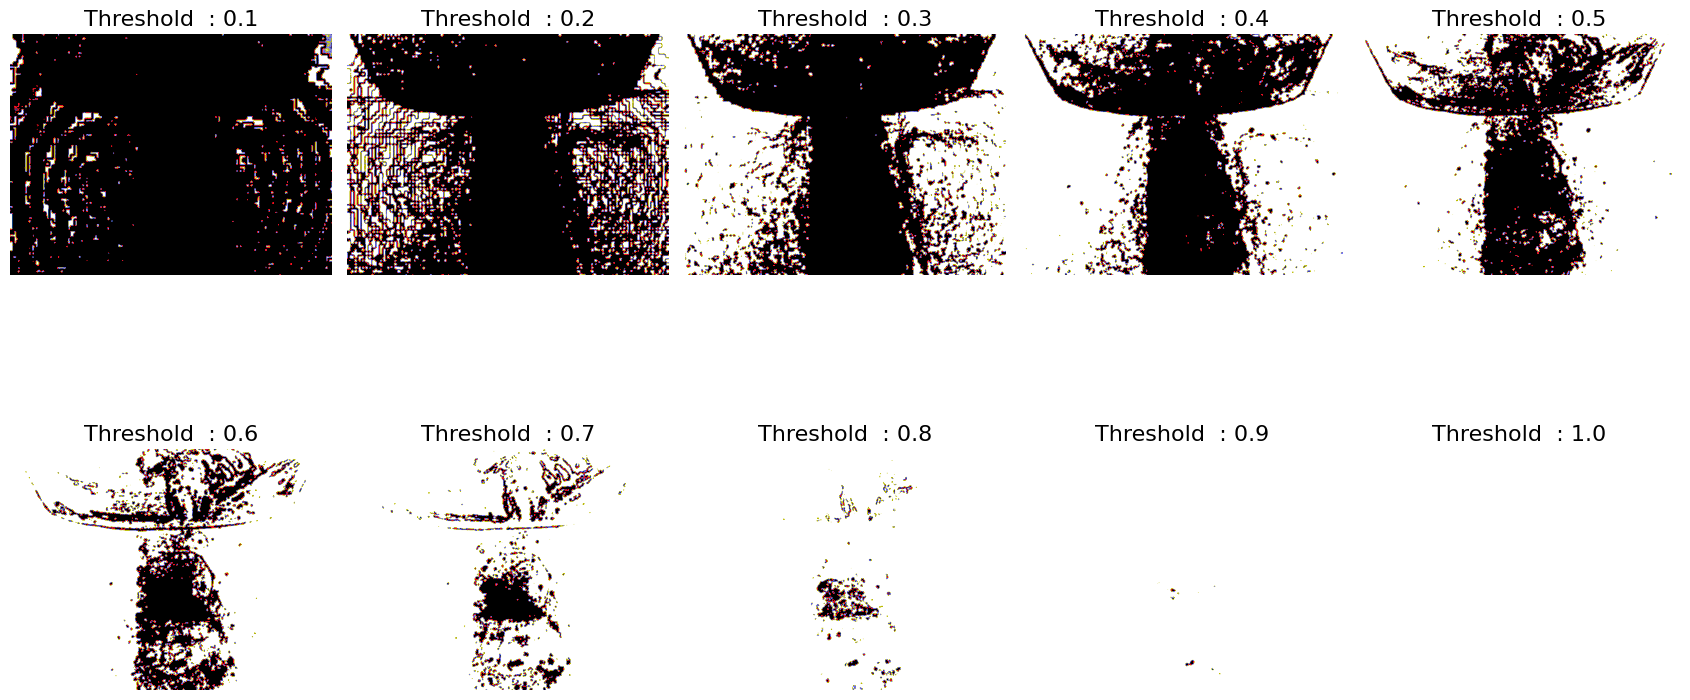

In [7]:
funcs.threshold_checker(trail, entropy_val=7)

/var/folders/7g/v0vfsyyx33jb34b519lc7pyr0000gn/T/ipykernel_15144/1197586599.py:2: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  funcs.comparer_duo(trail, funcs.entropy_based_thresholder(trail, entropy_val=7, threshold=0.5))


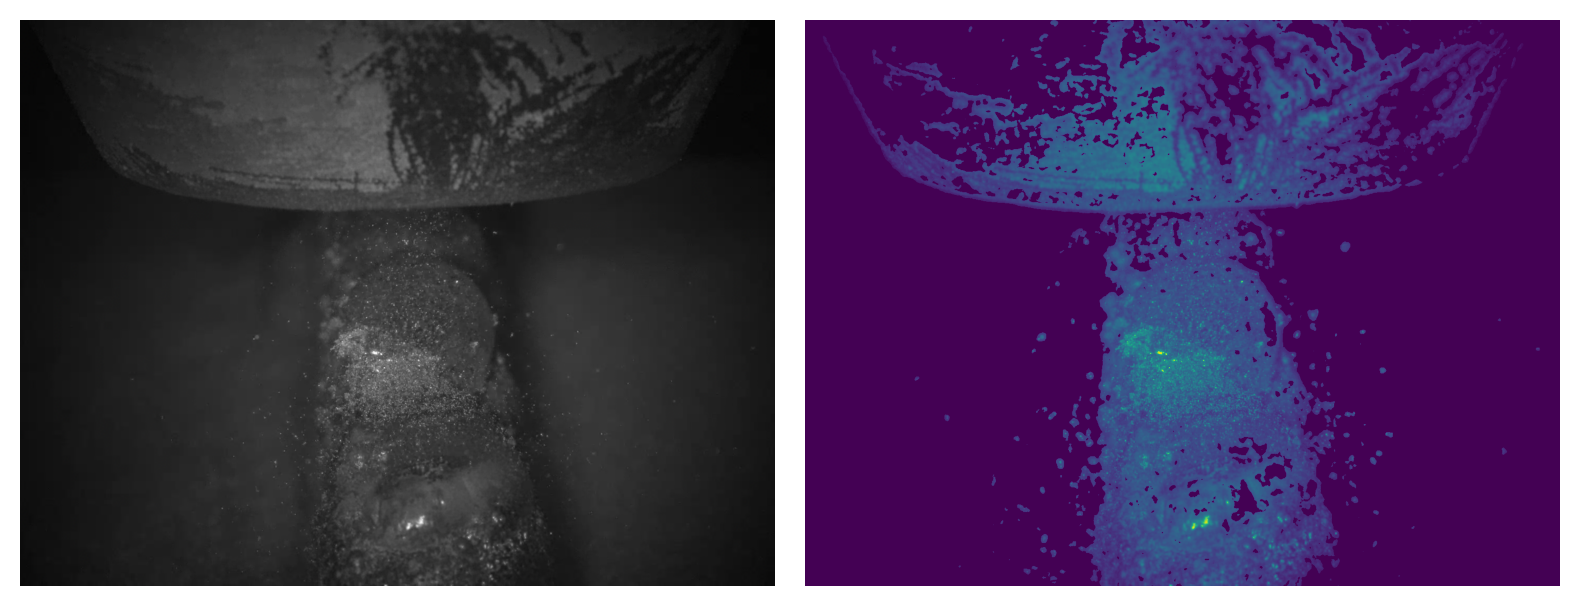

In [2]:
trail = imread('Images/Inputs/Set1/20240816-161944712534-0002.png')
funcs.comparer_duo(trail, funcs.entropy_based_thresholder(trail, entropy_val=7, threshold=0.5))

Threshold = 0.5 looks the best here. Next we detect edges in the thresholded image using the canny edge detector.

## Finding Canny Edges

Applying Canny Edge Detector

/var/folders/7g/v0vfsyyx33jb34b519lc7pyr0000gn/T/ipykernel_15144/3796278804.py:4: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  trail_thresh = funcs.entropy_based_thresholder(trail, entropy_val=7, threshold=0.5)


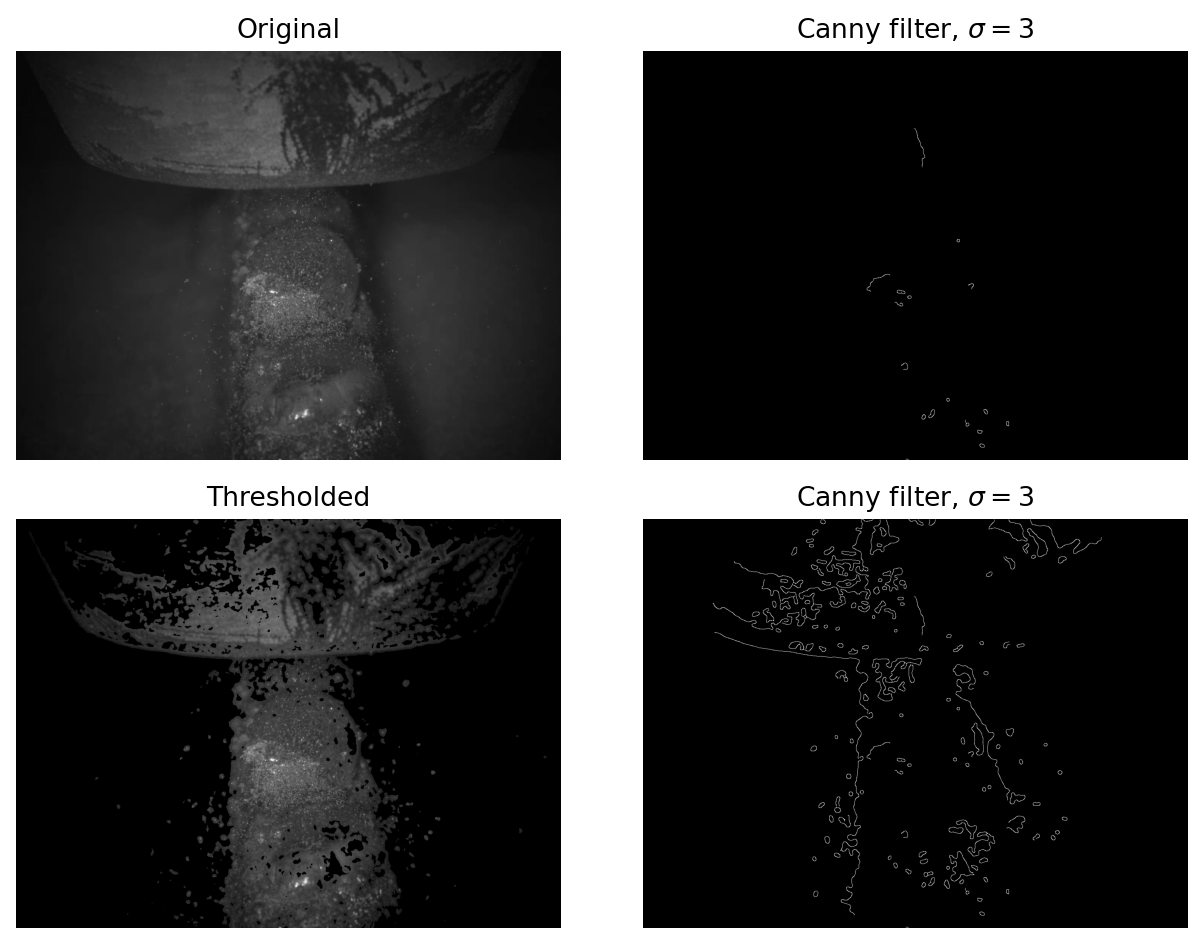

In [17]:
fig, axs = plt.subplots(2,2, figsize=(8,6), dpi=160)

trail_gray = rgb2gray(trail)
trail_thresh = funcs.entropy_based_thresholder(trail, entropy_val=7, threshold=0.5)

imgs=[
    trail,
    feature.canny(trail_gray, sigma=3),
    trail_thresh,
    feature.canny(trail_thresh, sigma=3)
]

titles = ['Original', r'Canny filter, $\sigma=3$', 'Thresholded', r'Canny filter, $\sigma=3$']

for n, ax in enumerate(axs.flatten()):
    ax.set_axis_off()
    ax.imshow(imgs[n], cmap='gray')
    ax.set_title(titles[n])
fig.tight_layout()

Try applying filters to image to reject noise

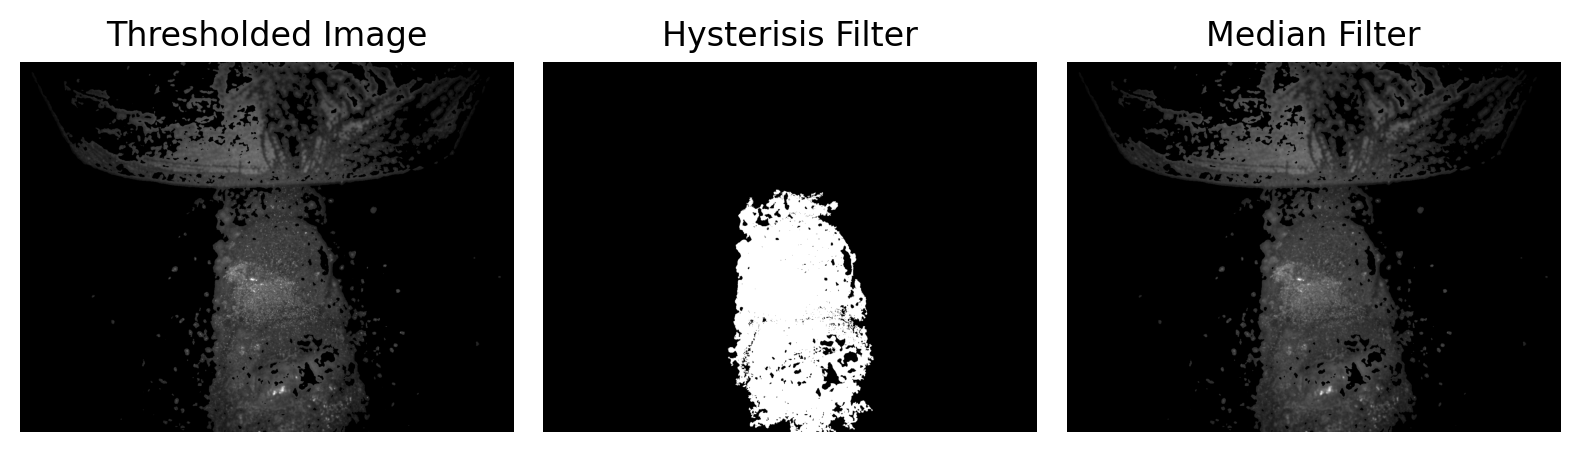

In [25]:
titles = ['Thresholded Image', 'Hysterisis Filter', 'Median Filter']
images = [
    trail_thresh, 
    filters.apply_hysteresis_threshold(trail_thresh, 0.18, 0.90), 
    filters.median(trail_thresh)#look more into this 
]

fig, axs = plt.subplots(1,3, figsize=(8,16), dpi=200)
for n, ax in enumerate(axs.flatten()):
    ax.set_axis_off()
    ax.set_title(titles[n])
    ax.imshow(images[n], cmap='gray')   
fig.tight_layout()

## Blob Detection

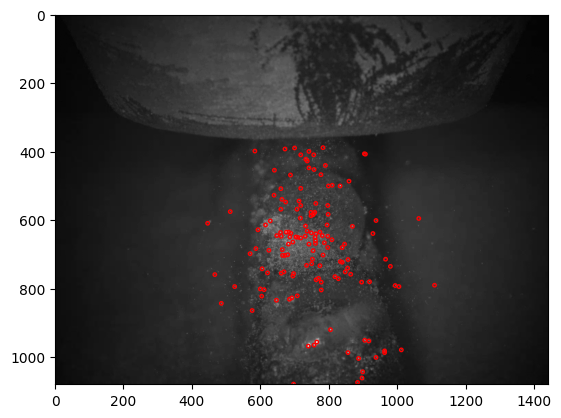

In [37]:
fig, ax = plt.subplots()
blobs_dog = feature.blob_dog(trail_gray, max_sigma=100, threshold=0.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2) 
ax.imshow(trail_gray, cmap='gray')
for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), color='red', linewidth=1, fill=False)
    ax.add_patch(c)

Try applying median filter to thresholded image

## Similarly for Set 2

/var/folders/7g/v0vfsyyx33jb34b519lc7pyr0000gn/T/ipykernel_15144/1264914252.py:2: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  funcs.comparer_duo(trail, funcs.entropy_based_thresholder(trail2, entropy_val=7, threshold=0.5))


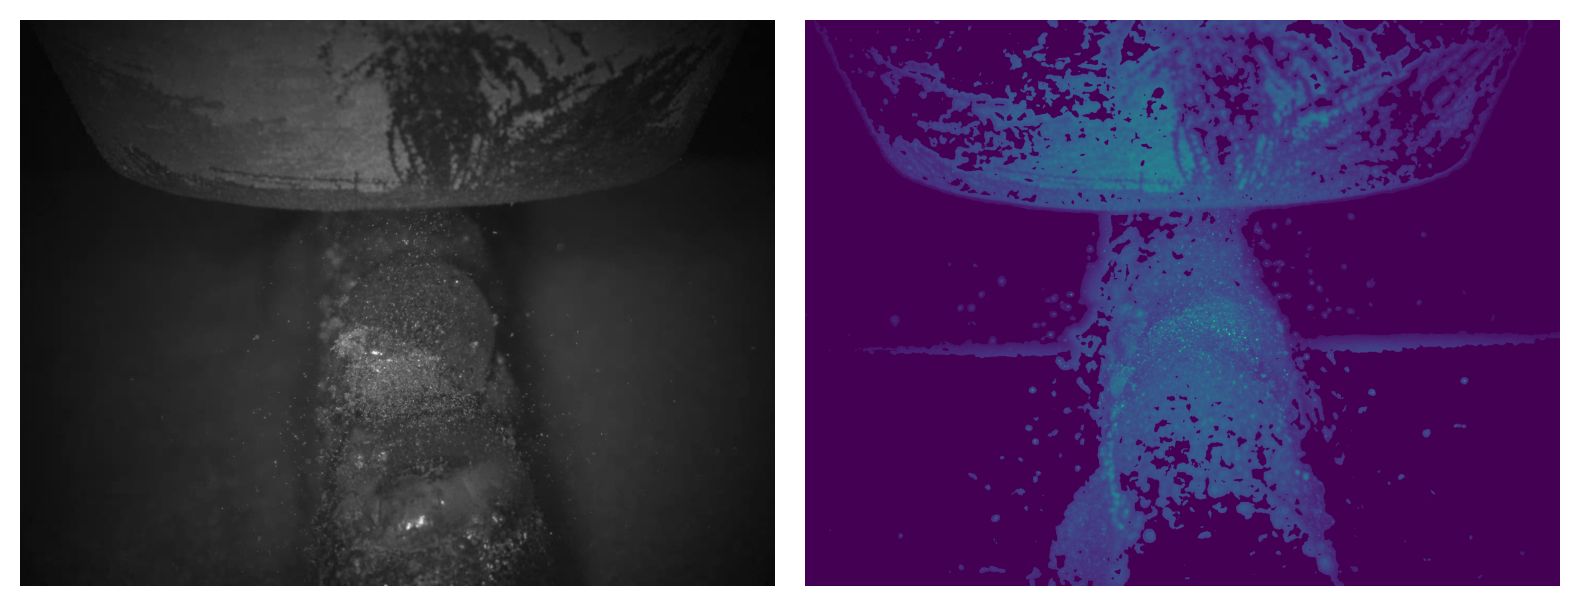

In [26]:
trail2 = imread('Images/Inputs/Set2/20240816-161944712534-0015.png')
funcs.comparer_duo(trail, funcs.entropy_based_thresholder(trail2, entropy_val=7, threshold=0.5))

### Selecting the "Right" Part of the image

Cropping to the relevant part of the image

/var/folders/7g/v0vfsyyx33jb34b519lc7pyr0000gn/T/ipykernel_15144/54235352.py:2: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  test_thresh = funcs.entropy_based_thresholder(test_cropped, entropy_val=7, threshold=0.5)


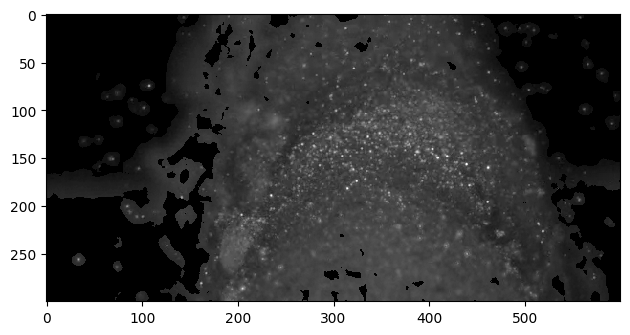

In [27]:
test_cropped = trail2[450:750, 400:1000]
test_thresh = funcs.entropy_based_thresholder(test_cropped, entropy_val=7, threshold=0.5)
imshow(test_thresh)

### Comparing hysteresis for thresholded and unthresholded images

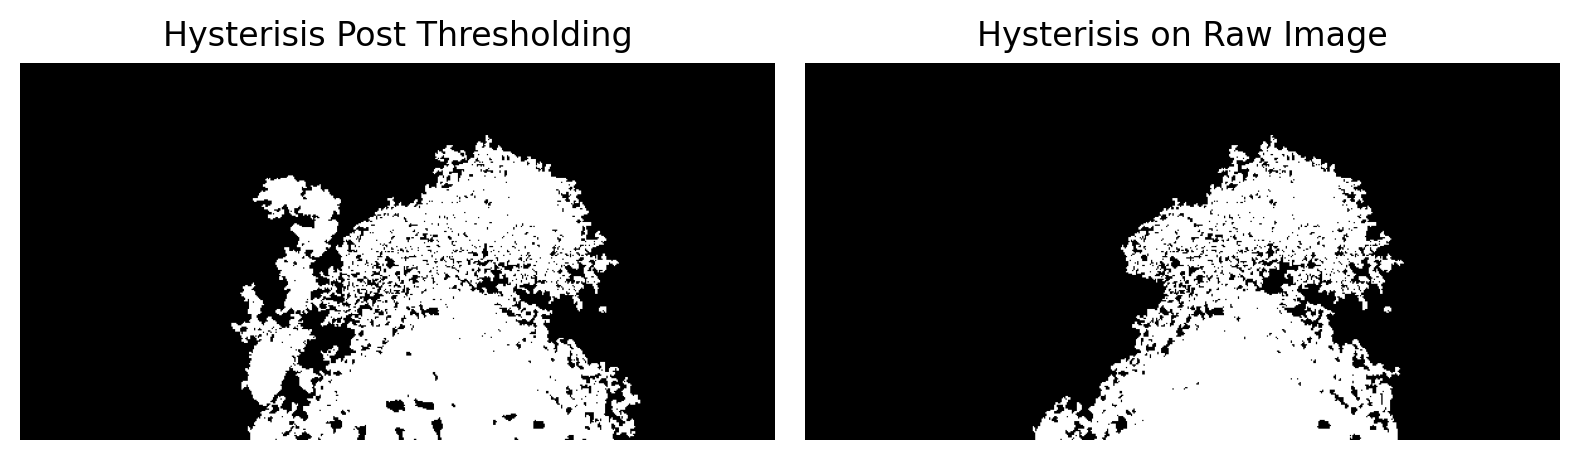

In [31]:
test_thresh_hyst = filters.apply_hysteresis_threshold(test_thresh, 0.24, 0.99)
test_hyst = filters.apply_hysteresis_threshold(rgb2gray(test_cropped), 0.245, 0.999)
imgs = [test_thresh_hyst, test_hyst]
titles = ['Hysterisis Post Thresholding', 'Hysterisis on Raw Image']
fig, axs = plt.subplots(1, 2, figsize=(8, 14), dpi = 200)
for n, ax in enumerate(axs.flatten()):
    ax.set_axis_off()
    ax.set_title(titles[n])
    ax.imshow(imgs[n], cmap='gray')
fig.tight_layout()

This looks good for a first try! Lets try to do this for a bunch of images in Set 2

In [22]:
import os, glob

path = 'Images/Inputs/Set2'
imagePaths = [f for f in glob.glob(path + '/*.png')]  # or .jpg, .tif, etc Done to ensure only png images are taken

image_set = []

for n, imagePath in enumerate(imagePaths):
    image_set.append(imread(imagePath))


joined = np.stack(image_set)



In [24]:
joined[0].shape

(1080, 1440, 3)

In [ ]:
import os
import glob


#path = 'Images/Inputs/Set3'
#imagePaths = [f for f in glob.glob(path + '/*.png')]  # or .jpg, .tif, etc Done to ensure only png images are taken

#for n, img in enumerate(imagePaths):
#    raw_img = imread(img)
#    grayscale_img = rgb2gray(raw_img)
#    hysterisis_image = filters.apply_hysteresis_threshold(grayscale_img, 0.245, 0.999)
#    imsave('Images/Inputs/SavesSet3/img'+str(n)+'.png', img_as_ubyte(hysterisis_image))
    


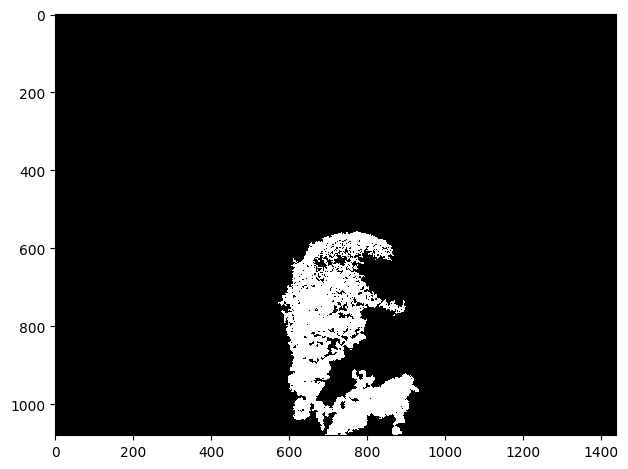

In [8]:
imshow('Images/Inputs/SavesSet3/img2.png')

^This also looks great! Finally we try to do this 

## Making a pipeline for Set 3

In [39]:
trail3 = imread('Images/Inputs/Set3/20240816-161944712534-0080.png')
trail3_cropped = trail3[450:700, 500:950]
trail3_hysterisis = filters.apply_hysteresis_threshold(rgb2gray(trail3_cropped), 0.268, 0.999)

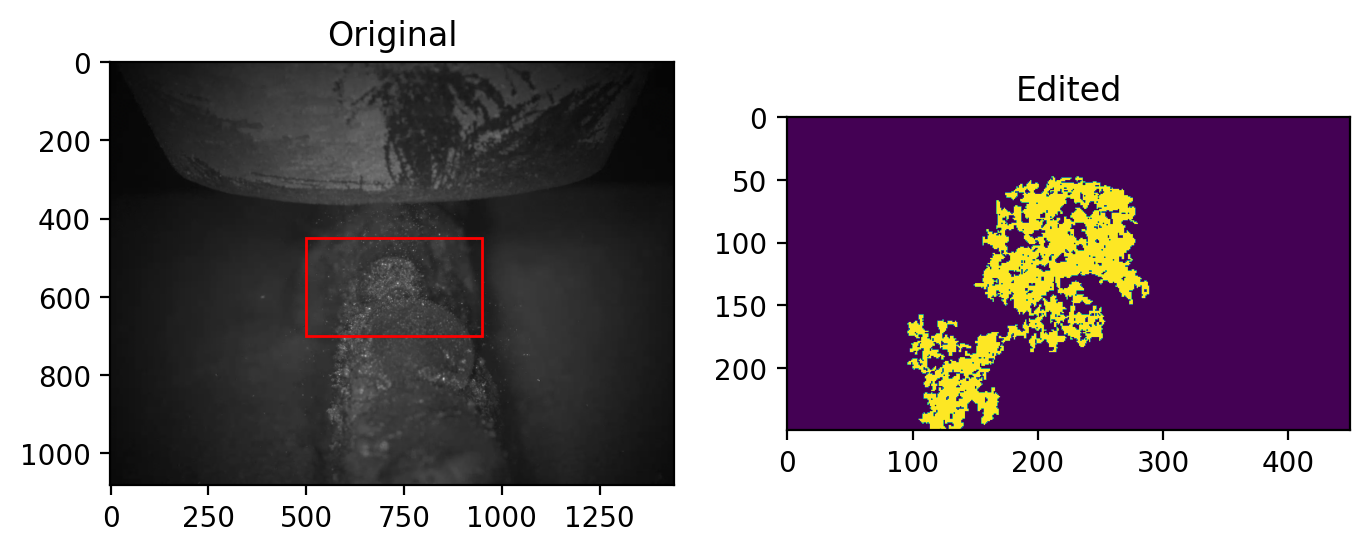

In [40]:
from matplotlib.patches import Rectangle
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,14), dpi=200)

ax1.set_title('Original')
ax1.imshow(trail3)
rect1 = Rectangle((500,450), 450, 250, color='red', fc = 'none',lw = 1)
ax1.add_patch(rect1)

ax2.set_title('Edited')
ax2.imshow(trail3_hysterisis)

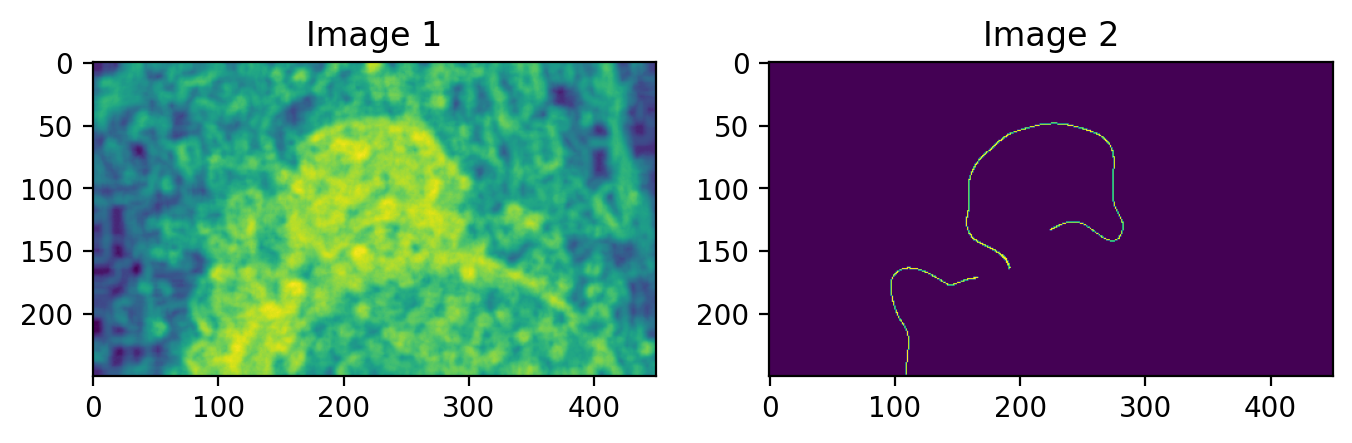

In [41]:
comparer(entropy(rgb2gray(trail3_cropped), disk(6)), feature.canny(trail3_hysterisis, sigma=12))

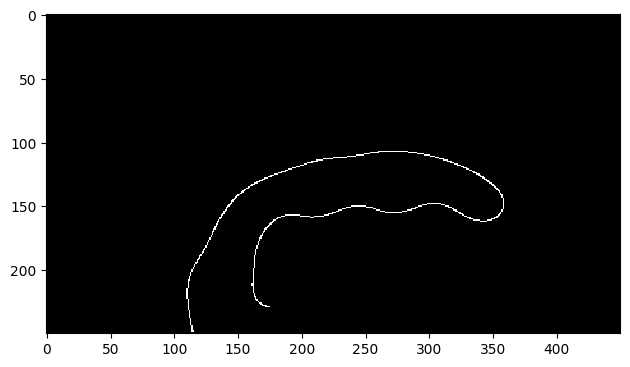

In [26]:
imshow(feature.canny(trail3_hysterisis, sigma=12))

In [16]:
'''import os
import glob


path = 'Images/Inputs/Set3'
imagePaths = [f for f in glob.glob(path + '/*.png')]  # or .jpg, .tif, etc Done to ensure only png images are taken

for n, img in enumerate(imagePaths):
    raw_img = imread(img)
    cropped_img = raw_img[450:700, 500:950]
    hysterisis_image = filters.apply_hysteresis_threshold(rgb2gray(cropped_img), 0.238, 0.9)
    CED_img = feature.canny(hysterisis_image, sigma=11)
    imsave('Images/Outputs/Set3CED/img'+str(n)+'.png', img_as_ubyte(CED_img))'''

"import os\nimport glob\n\n\npath = 'Images/Inputs/Set3'\nimagePaths = [f for f in glob.glob(path + '/*.png')]  # or .jpg, .tif, etc Done to ensure only png images are taken\n\nfor n, img in enumerate(imagePaths):\n    raw_img = imread(img)\n    cropped_img = raw_img[450:700, 500:950]\n    hysterisis_image = filters.apply_hysteresis_threshold(rgb2gray(cropped_img), 0.238, 0.9)\n    CED_img = feature.canny(hysterisis_image, sigma=11)\n    imsave('Images/Outputs/Set3CED/img'+str(n)+'.png', img_as_ubyte(CED_img))"